In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve
import pickle
import metrics


with open('.env') as f:
    _data_pth_ = f.readline().strip()
    _data_pth_ = os.path.expanduser(_data_pth_)

### load data

In [5]:
data = pd.read_csv(f'{_data_pth_}/processed/train_transaction.csv', index_col=0)
y, X = data['isFraud'], data.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Load model

In [6]:
filename = 'LR_model.sav'
# Load the Model back from file
with open(filename, 'rb') as file:  
    model = pickle.load(file)

/usr/local/miniconda3/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


### evaluate 

/usr/local/miniconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9712860251579003


/usr/local/miniconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/miniconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/miniconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9717465709491531
Test data
[[1531, 187842], [326, 5180]]
Misclassification error =  5506
SENS(recall)  =  0.22813291610788258
SPEC   =  0.9982675056332639
PPV(Precision)   =  0.8244480344641896
NPV   =  0.9731636808239476


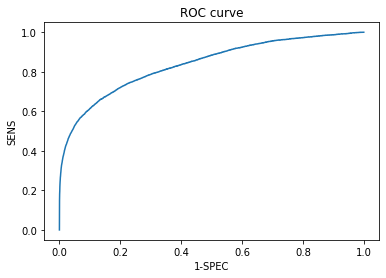

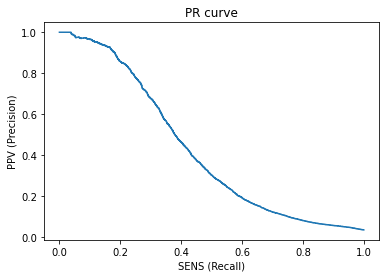

In [7]:
sc_train = model.score(X_train, y_train)
sc_test = model.score(X_test, y_test)
y_pred_test = model.predict(X_test)
probs_LR=model.predict_proba(X_test)
print(sc_train)
print(sc_test)

metrics.conf_matrix(y_test,y_pred_test)
metrics.roc_pr_curve(y_test,probs_LR)